In [ ]:
import requests
import json

In [ ]:
import pandas as pd
dataframe_data = pd.DataFrame()

In [ ]:
def scrape_data(offset, next_prev, url, max_data):
    global dataframe_data
    headers = {
        "Accept": "*/*",
        "Accept-Language": "id,en-US;q=0.9,en;q=0.8",
        "Connection": "keep-alive",
        "Content-Type": "application/x-www-form-urlencoded; charset=UTF-8",
        # "Cookie": "_ga=GA1.3.36543714.1710898168; _ga_V2BBWEH7MF=GS1.1.1710898168.1.0.1710898171.0.0.0; ai_user=NxbzQAyBbjHTjqHgriFXK5^|2024-03-20T01:29:35.469Z; webreg=tfjers0298on46nlq7uuvngfiilf0not; csrf_cookie_name=b051958b0ed699f3d3b6486a6f2bb00e; TS01d5cb1b=016cc907c0e3314f7492c4d156e0a9c1ce77b7bde72d593982d2c1ded71b327d6ace90d229c89c5f49745dbf58a7d77763c99aa49d3e24e5390982f585d1440385837b56efd18016546feefd691328b3a3f3bf8136^",
        "Cookie":"_ga=GA1.3.36543714.1710898168; _ga_V2BBWEH7MF=GS1.1.1710898168.1.0.1710898171.0.0.0; ai_user=NxbzQAyBbjHTjqHgriFXK5|2024-03-20T01:29:35.469Z; webreg=lf8jnkk7lk4q5rcsp0ecn41lr3qiodja; TS01d5cb1b=016cc907c033209e46ee38666b85e8d0d49566feca1a8ec1e6d467cc896b35e3712671976c12d1a2a50ce1eca7db3a6ee8ef2aeba936f986b515f7d70dbf773ba3c29fbf87",
        "Origin": "https://cekbpom.pom.go.id",
        "Referer": "https://cekbpom.pom.go.id/kosmetika",
        "Sec-Fetch-Dest": "empty",
        "Sec-Fetch-Mode": "cors",
        "Sec-Fetch-Site": "same-origin",
        "User-Agent": "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Mobile Safari/537.36",
        "X-Requested-With": "XMLHttpRequest",
        "sec-ch-ua": "\"Google Chrome\";v=\"123\", \"Not:A-Brand\";v=\"8\", \"Chromium\";v=\"123\"",
        "sec-ch-ua-mobile": "?1",
        "sec-ch-ua-platform": "\"Android\""
    }
    data = {
        "offset": offset,
        "next_prev": next_prev,
        "count_data_kosmetika": max_data,
        "marked": "next"
    }

    response = requests.post(url, headers=headers, data=data)
    hasil = response.content
    json_hasil = json.loads(hasil.decode('utf-8'))
    information_detail = json_hasil['data_kosmetika']
    for data in information_detail:
        new_data = pd.DataFrame([data])
        dataframe_data = pd.concat([dataframe_data, new_data], ignore_index=True)

    print(f"offset {offset}, next_prev {next_prev} berhasil diambil")


def scrape_all_data(max_data, url):
    batch_size = 10

    for offset in range(56151, max_data + 1, batch_size):
        next_prev = offset + batch_size - 1
        scrape_data(offset, next_prev, url, max_data)

In [ ]:
semua_data = scrape_all_data(max_data=421113,
                            url='https://cekbpom.pom.go.id/prev_next_pagination_kosmetika')

In [ ]:
dataframe_data

,PRODUCT_ID,APPLICATION_ID,CLASS_ID,PRODUCT_REGISTER,PRODUCT_DATE,PRODUCT_NAME,PRODUCT_BRANDS,PRODUCT_PACKAGE,PENDAFTAR,ALAMAT_PENDAFTAR,STATUS
0,MAZA-3583290336,01,12,NA18231207655,Terbit: 22-09-2023,Deep Cleansing Daily Scrub,Merk: KLARENS,"Kemasan: Tube, 100 g","ANUGERAH FILIA ASIA, PT","Kota Adm Jakarta Selatan, Dki Jakarta",Berlakus/d 21-09-2026
1,MAZA-3583290325,01,12,NA18230111432,Terbit: 22-09-2023,Bright &amp; Glow Day Cream,Merk: DEKALLEA,"Kemasan: Pot, 10 g, Pot, 20 g","BUNGA AMERTA KOSMETINDO, PT","Kota Adm Jakarta Selatan, Dki Jakarta",Berlakus/d 21-09-2026
2,MAZA-3583290362,01,12,NA18230111434,Terbit: 22-09-2023,Brightening Lotion,Merk: STWHITE,"Kemasan: Botol, 100 g, Botol, 100 mL, Botol,...","BUNGA AMERTA KOSMETINDO, PT","Kota Adm Jakarta Selatan, Dki Jakarta",Berlakus/d 21-09-2026
3,MAZA-3583290363,01,12,NE51230100453,Terbit: 22-09-2023,Daily Nourishing Body Lotion Underwater Oasis,Merk: BATH &amp; BODY WORKS,"Kemasan: Botol, 236 mL, Botol, 88 mL","PUTRA VALINDO, PT","Kota Adm Jakarta Selatan, Dki Jakarta",Berlakus/d 21-09-2026
4,MAZA-3583290372,01,12,NA18230900361,Terbit: 22-09-2023,Antiperspirant Deodorant - Max Confident,Merk: TOTAL CARE MEN,"Kemasan: Botol, 50 mL","BARCLAY PRODUCTS, PT","Kota Adm Jakarta Selatan, Dki Jakarta",Berlakus/d 21-09-2026
...,...,...,...,...,...,...,...,...,...,...,...
1465,MAZA-3583290679,01,12,NA22230300086,Terbit: 19-09-2023,Brightening Powder Foundation BF20,Merk: CLE DE PEAU BEAUTE,"Kemasan: Case, Dus 11 g, Case, 11 g","SHISEIDO COSMETICS INDONESIA, PT","Kota Adm Jakarta Selatan, Dki Jakarta",Berlakus/d 18-09-2026
1466,MAZA-3583252172,01,12,NA18230111635,Terbit: 19-09-2023,Body Slimming Gel,Merk: LUCRISHA,"Kemasan: Pot, Dus 100 g, Pot, Dus 150 g","DUA NAGA KOSMETINDO, PT","Kab Sukoharjo, Jawa Tengah",Berlakus/d 18-09-2026
1467,MAZA-3583246119,01,12,NA22232000015,Terbit: 19-09-2023,Wrinkle Smoothing Serum Supreme,Merk: CLE DE PEAU BEAUTE,"Kemasan: Tube, Dus 20 mL, Tube (Tester), Dus 2...","SHISEIDO COSMETICS INDONESIA, PT","Kota Adm Jakarta Selatan, Dki Jakarta",Berlakus/d 18-09-2026
1468,MAZA-3583247219,01,12,NA26231900047,Terbit: 19-09-2023,Wild Ginseng Snail Cream,Merk: SANSIM,"Kemasan: Pot, Dus 50 mL, Pouch, 1 mL, Pouch, ...","BINA JUTAJELITA, PT","Kota Adm Jakarta Pusat, Dki Jakarta",Berlakus/d 18-09-2026


In [ ]:
dataframe_data.to_excel('Data/kecantikan_bpom_6.xlsx', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/kecantikan_bpom_6.xlsx')
df.head(3)

,PRODUCT_ID,APPLICATION_ID,CLASS_ID,PRODUCT_REGISTER,PRODUCT_DATE,PRODUCT_NAME,PRODUCT_BRANDS,PRODUCT_PACKAGE,PENDAFTAR,ALAMAT_PENDAFTAR,STATUS
0,MAZA-3583396742,1,12,NC14240600189,Terbit: 22-03-2024,Eagle Eyed Stranger Body Oil Mist,Merk: OJAR,"Kemasan: Botol, Dus 100 mL, Botol (Tester), 1...","IZONE INDONUSA, PT, PT","Kota Adm Jakarta Utara, Dki Jakarta",Berlakus/d 22-03-2027
1,MAZA-3583396819,1,12,NA18240104049,Terbit: 22-03-2024,PEONY BLUSH BODY LOTION,Merk: B3F,"Kemasan: Botol, 100 mL, Botol, 150 mL, Botol...","DUTA COSMETICS INDONESIA, PT","Kab Malang, Jawa Timur",Berlakus/d 22-03-2027
2,MAZA-3583396865,1,12,NA18240104050,Terbit: 22-03-2024,Whitening Booster Night Lotion,Merk: FORWIN SKIN,"Kemasan: Botol, 100 mL, Botol, 150 mL, Botol...","ANJALIS GROUP INDONESIA, PT","Kab Ponorogo, Jawa Timur",Berlakus/d 22-03-2027


In [ ]:
df['PRODUCT_BRANDS'] = df['PRODUCT_BRANDS'].str.replace('Merk: ', '')
df

,PRODUCT_ID,APPLICATION_ID,CLASS_ID,PRODUCT_REGISTER,PRODUCT_DATE,PRODUCT_NAME,PRODUCT_BRANDS,PRODUCT_PACKAGE,PENDAFTAR,ALAMAT_PENDAFTAR,STATUS
0,MAZA-3583396742,1,12,NC14240600189,Terbit: 22-03-2024,Eagle Eyed Stranger Body Oil Mist,OJAR,"Kemasan: Botol, Dus 100 mL, Botol (Tester), 1...","IZONE INDONUSA, PT, PT","Kota Adm Jakarta Utara, Dki Jakarta",Berlakus/d 22-03-2027
1,MAZA-3583396819,1,12,NA18240104049,Terbit: 22-03-2024,PEONY BLUSH BODY LOTION,B3F,"Kemasan: Botol, 100 mL, Botol, 150 mL, Botol...","DUTA COSMETICS INDONESIA, PT","Kab Malang, Jawa Timur",Berlakus/d 22-03-2027
2,MAZA-3583396865,1,12,NA18240104050,Terbit: 22-03-2024,Whitening Booster Night Lotion,FORWIN SKIN,"Kemasan: Botol, 100 mL, Botol, 150 mL, Botol...","ANJALIS GROUP INDONESIA, PT","Kab Ponorogo, Jawa Timur",Berlakus/d 22-03-2027
3,MAZA-3583396889,1,12,NA18241202203,Terbit: 22-03-2024,Toner Whitening Acne Booster,RA GLOW,"Kemasan: Botol, 30 mL, Botol, 60 mL, Botol, ...","VINS QUALITY INDONESIA, CV","Kab Tangerang, Banten",Berlakus/d 22-03-2027
4,MAZA-3583396895,1,12,NA18240104045,Terbit: 22-03-2024,Glow Body Serum,OSD GLOW BEAUTY SKIN CARE,"Kemasan: Tube, 100 mL, Tube, 120 mL, Tube, ...","OLLA SKIN DAILY, CV","Kota Depok, Jawa Barat",Berlakus/d 22-03-2027
...,...,...,...,...,...,...,...,...,...,...,...
43255,MAZA-3583384804,1,12,NA18240104053,Terbit: 24-03-2024,HB Dosting Glow,YDYA SKIN,"Kemasan: Pot, 100 g, Pot, 200 g, Pot, 300 g...","MENTARI GLOBAL KOSMETIKA, CV","Kab Boyolali, Jawa Tengah",Berlakus/d 24-03-2027
43256,MAZA-3583389568,1,12,NA26240200074,Terbit: 24-03-2024,Mugwort Sheet Mask,I&#039;M FROM,"Kemasan: Sachet, Dus 23 mL","SOCIAL BELLA INDONESIA, PT, PT","Kota Adm Jakarta Barat, Dki Jakarta",Berlakus/d 24-03-2027
43257,MAZA-3583389976,1,12,NA18240104068,Terbit: 24-03-2024,Brightening and Moisturizing Body Lotion,BEAUGALAC,"Kemasan: Botol, 250 mL","NOSE HERBAL INDO, PT","Kota Adm Jakarta Utara, Dki Jakarta",Berlakus/d 24-03-2027
43258,MAZA-3583392230,1,12,NA26241200193,Terbit: 24-03-2024,YOUTHBIOTICS LOTUS PROBIOTIC TONER,THE PURE LOTUS,"Kemasan: Botol, 220 mL","INFINITI MARVELA LEVANA, PT","Kota Adm Jakarta Selatan, Dki Jakarta",Berlakus/d 24-03-2027


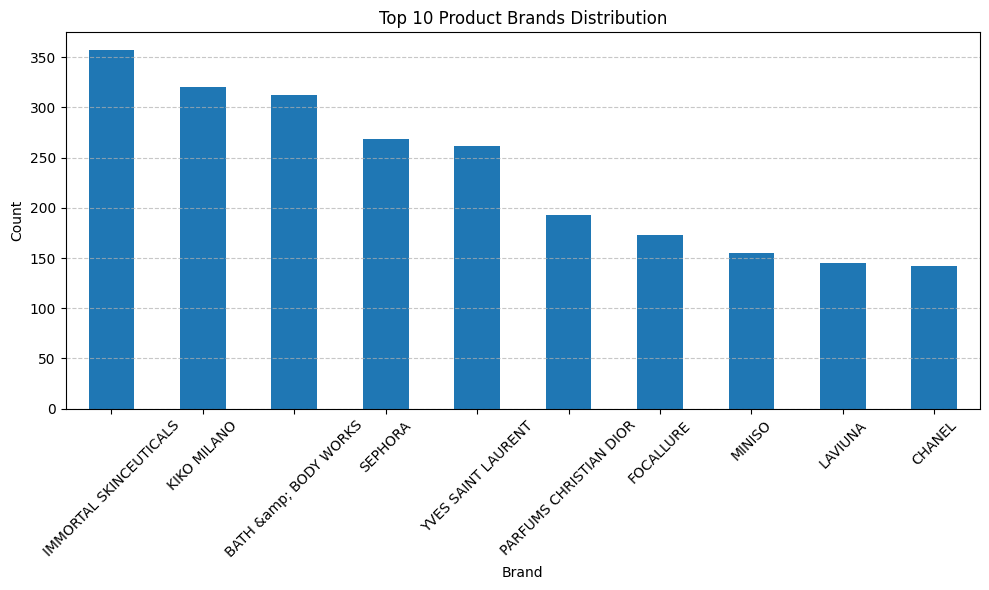

In [ ]:
import matplotlib.pyplot as plt

brand_counts = df['PRODUCT_BRANDS'].value_counts()
top_10_brands = brand_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_brands.plot(kind='bar')
plt.title('Top 10 Product Brands Distribution')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()